In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
data = pd.read_csv('flight_delays.csv')

In [84]:
data.head(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
5,c-8,c-3,c-4,1918,NW,MEM,MCO,683,N
6,c-1,c-27,c-4,754,DL,PBI,LGA,1035,N
7,c-4,c-29,c-6,635,OH,MSP,CVG,596,N
8,c-7,c-28,c-5,735,AA,ONT,DFW,1189,N
9,c-6,c-20,c-2,2029,OO,DEN,PSC,853,N


### Задание

1) доля всех задержек ко всем вылетам

2) найти зависимость количества задержек от длины пути, который предстоит пролететь самолету

3) топ 5 направлений, для которых чаще всего происходят задержки

4) в какие времена года чаще всего происходят задержки рейсов

5) найти топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы

6) найти топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки

7) найти необычную зависимость количества задержек от имеющихся данных

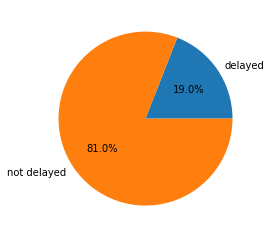

In [33]:
plt.pie([len(data[data['dep_delayed_15min'] == 'Y']), len(data[data['dep_delayed_15min'] == 'N'])],
        labels=['delayed', 'not delayed'], autopct='%1.1f%%')
plt.show()

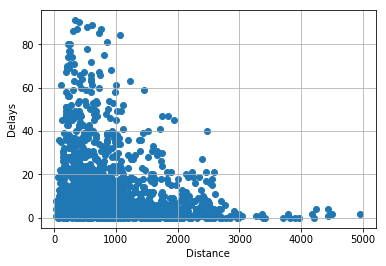

In [43]:
data1 = data.groupby('Distance').apply(lambda data: (data['dep_delayed_15min'] == 'Y').sum())

plt.scatter(data1.keys().values, data1.values)
plt.xlabel('Distance')
plt.ylabel('Delays')
plt.grid()

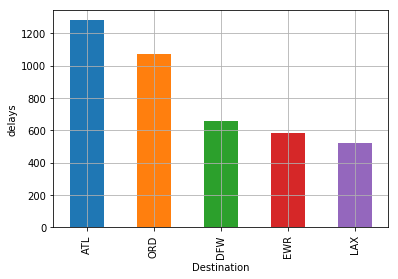

In [60]:
data.groupby('Dest').apply(lambda data: (data['dep_delayed_15min'] == 'Y').sum()).sort_values(ascending=False)[:5].plot(kind='bar')
plt.xlabel('Destination')
plt.ylabel('delays')
plt.grid()

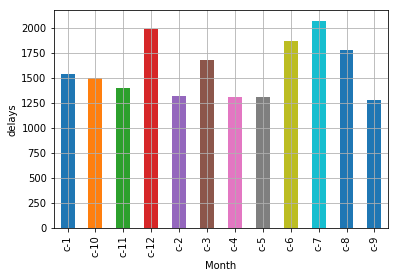

In [91]:
data.groupby('Month').apply(lambda data: (data['dep_delayed_15min'] == 'Y').sum()).plot(kind='bar')
plt.ylabel('delays')
plt.grid()

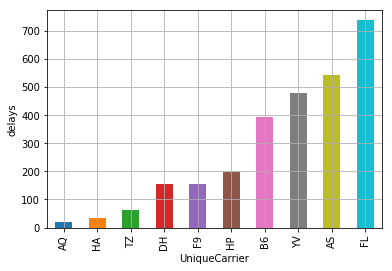

In [87]:
data.groupby('UniqueCarrier').apply(lambda data: (data['dep_delayed_15min'] == 'Y').sum()).sort_values(ascending=True)[:10].plot(kind='bar')
plt.ylabel('delays')
plt.grid()

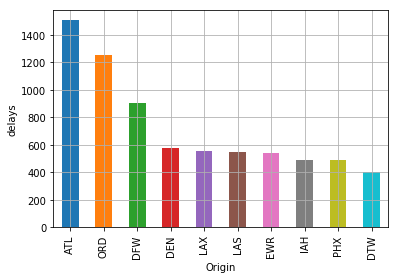

In [90]:
data.groupby('Origin').apply(lambda data: (data['dep_delayed_15min'] == 'Y').sum()).sort_values(ascending=False)[:10].plot(kind='bar')
plt.ylabel('delays')
plt.grid()